# Visualise output from raw_download.py

In [127]:
import pandas as pd
import geopandas as gp
import os

In [128]:
pd.set_option('display.max_columns', None)

## reproduce = True

This demo is for the scenario where the user used raw_download.py to reproduce the Mapillary and KartaView data available up till 1 Feb 2024 for two cities: Singapore (SG) and Stuttgart (DE)


In [132]:
# specify the directory where the output CSVs from raw_download.py are stored 
output_dir = './sample_output/reproduce_true'

dfs = []

for filename in os.listdir(output_dir):
    if filename != '.DS_Store':
        if os.path.isfile(os.path.join(output_dir, filename)):
            df = pd.read_csv(os.path.join(output_dir, filename))
            dfs.append(df)
            print(filename)
            print(df.info())
            print("=========================")

/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,5,11,12,13,14,17,18,19,20,21,22,23,24,30,31,32,33,39,40,41,43,45,49,50,51,54,57,61,62,63,64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Stuttgart_1276171358.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80835 entries, 0 to 80834
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mly_captured_at             52576 non-null  float64
 1   heading                     74734 non-null  float64
 2   mly_creator_id              52576 non-null  float64
 3   orig_id                     80835 non-null  int64  
 4   mly_is_pano                 52576 non-null  object 
 5   mly_sequence_id             52576 non-null  object 
 6   mly_organization_id         125 non-null    float64
 7   city_id                     80835 non-null  int64  
 8   lat                         80835 non-null  float64
 9   lon                         80835 non-null  float64
 10  source                      80835 non-null  object 
 11  kv_autoImgProcessingResult  28259 non-null  object 
 12  kv_autoImgProcessingStatus  28259 non-null  object 
 13  kv_dat

/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,6,11,12,13,14,17,18,19,20,21,22,23,24,30,31,32,33,39,40,41,43,45,49,50,51,54,57,61,62,63,64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [133]:
gdfs = []
for df in dfs:
    gdf = gp.GeoDataFrame(
        df, geometry=gp.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
    )
    gdfs.append(gdf)

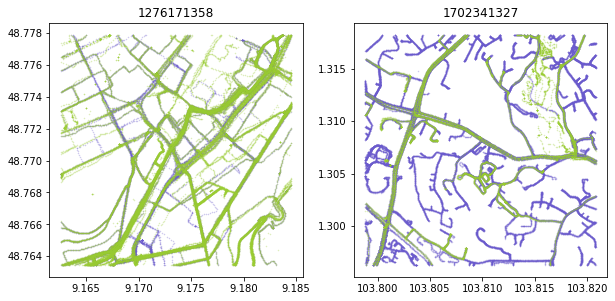

In [134]:
import matplotlib.pyplot as plt
# create Matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(10,10))
# plot points
for i in range(2):
    gdf = gdfs[i]
    city_id = gdf.iloc[0]['city_id']
    if gdf[gdf['source'] == 'KartaView'].empty == False:
        gdf[gdf['source'] == 'KartaView'].plot(ax=axes[i], marker='o', color='slateblue', markersize=.3, alpha=.3)
    if gdf[gdf['source'] == 'Mapillary'].empty == False:
        gdf[gdf['source'] == 'Mapillary'].plot(ax=axes[i], marker='o', color='yellowgreen', markersize=.3, alpha=.3)
    axes[i].set_title(city_id)

### Match UUID
In this demo, we are matching the downloaded data with existing data to obtain their UUIDs for reproducing purposes.

In [135]:
df_merged = pd.concat(dfs, ignore_index=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146982 entries, 0 to 146981
Data columns (total 68 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   mly_captured_at             65893 non-null   float64 
 1   heading                     140433 non-null  float64 
 2   mly_creator_id              65893 non-null   float64 
 3   orig_id                     146982 non-null  int64   
 4   mly_is_pano                 65893 non-null   object  
 5   mly_sequence_id             65893 non-null   object  
 6   mly_organization_id         8184 non-null    float64 
 7   city_id                     146982 non-null  int64   
 8   lat                         146982 non-null  float64 
 9   lon                         146982 non-null  float64 
 10  source                      146982 non-null  object  
 11  kv_autoImgProcessingResult  81089 non-null   object  
 12  kv_autoImgProcessingStatus  81089 non-null   object  
 13 

In [115]:
df_existing = pd.read_csv('insert the path to simplemaps.csv from Global Streetscapes dataset (download from https://huggingface.co/datasets/NUS-UAL/global-streetscapes/tree/main/data)')
df_existing.info(verbose=True, show_counts=True)

/Users/yujun/opt/anaconda3/envs/ox/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004551 entries, 0 to 10004550
Data columns (total 15 columns):
 #   Column      Non-Null Count     Dtype  
---  ------      --------------     -----  
 0   uuid        10004551 non-null  object 
 1   source      10004551 non-null  object 
 2   orig_id     10004551 non-null  int64  
 3   city        10004551 non-null  object 
 4   city_ascii  10004551 non-null  object 
 5   city_id     10004551 non-null  int64  
 6   city_lat    10004551 non-null  float64
 7   city_lon    10004551 non-null  float64
 8   country     10004551 non-null  object 
 9   iso2        10003292 non-null  object 
 10  iso3        10004551 non-null  object 
 11  admin_name  9787502 non-null   object 
 12  capital     7265450 non-null   object 
 13  population  9919550 non-null   float64
 14  continent   10004551 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ GB


In [136]:
# matching the downloaded data with the current dataset based on 'source' and 'orig_id' to obtain UUIDs
df_merged = df_merged.merge(df_existing[['uuid', 'source', 'orig_id']], on=['source', 'orig_id'], how='left')
df_merged.info()
# in the 146982 images downloaded, we find 101780 matching records in the current dataset (101780 non-null values for 'uuid' column)
# the remaining images without a matching record are probably new data uploaded to Mapillary/KartaView since the current dataset was downloaded (Apr 2023 for Singapore and Mar 2024 for Stuttgart) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146982 entries, 0 to 146981
Data columns (total 69 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   mly_captured_at             65893 non-null   float64 
 1   heading                     140433 non-null  float64 
 2   mly_creator_id              65893 non-null   float64 
 3   orig_id                     146982 non-null  int64   
 4   mly_is_pano                 65893 non-null   object  
 5   mly_sequence_id             65893 non-null   object  
 6   mly_organization_id         8184 non-null    float64 
 7   city_id                     146982 non-null  int64   
 8   lat                         146982 non-null  float64 
 9   lon                         146982 non-null  float64 
 10  source                      146982 non-null  object  
 11  kv_autoImgProcessingResult  81089 non-null   object  
 12  kv_autoImgProcessingStatus  81089 non-null   object  
 13 

In [137]:
df_merged = df_merged[~df_merged.uuid.isnull()].reset_index(drop=True)
df_merged.info()
# removing the data without a matching record

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101780 entries, 0 to 101779
Data columns (total 69 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   mly_captured_at             65093 non-null   float64 
 1   heading                     95567 non-null   float64 
 2   mly_creator_id              65093 non-null   float64 
 3   orig_id                     101780 non-null  int64   
 4   mly_is_pano                 65093 non-null   object  
 5   mly_sequence_id             65093 non-null   object  
 6   mly_organization_id         8184 non-null    float64 
 7   city_id                     101780 non-null  int64   
 8   lat                         101780 non-null  float64 
 9   lon                         101780 non-null  float64 
 10  source                      101780 non-null  object  
 11  kv_autoImgProcessingResult  36687 non-null   object  
 12  kv_autoImgProcessingStatus  36687 non-null   object  
 13 

In [138]:
df_merged.city_id.value_counts()

1276171358    79201
1702341327    22579
Name: city_id, dtype: int64

In [139]:
df_existing[df_existing['city_id'].isin([1276171358, 1702341327])].city_id.value_counts()  

1276171358    79201
1702341327    22579
Name: city_id, dtype: int64

## reproduce = False

This demo is for the scenario where the user used raw_download.py to download new Mapillary and KartaView data available from 1 Feb 2024 onward for two cities: Singapore (SG) and Stuttgard (DE)

In [140]:
# specify the directory where the output CSVs from raw_download.py are stored 
output_dir = './sample_output/reproduce_false'

dfs = []

for filename in os.listdir(output_dir):
    if filename != '.DS_Store':
        if os.path.isfile(os.path.join(output_dir, filename)):
            df = pd.read_csv(os.path.join(output_dir, filename))
            dfs.append(df)
            print(filename)
            print(df.info())
            print("=========================")
            
# note that in this period only Mapillary has the updated data so all of the KartaView columns are missing

Stuttgart_1276171358.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mly_captured_at             1298 non-null   float64
 1   heading                     1725 non-null   float64
 2   mly_creator_id              1298 non-null   float64
 3   orig_id                     1725 non-null   int64  
 4   mly_is_pano                 1298 non-null   object 
 5   mly_sequence_id             1298 non-null   object 
 6   mly_organization_id         0 non-null      float64
 7   city_id                     1725 non-null   int64  
 8   lat                         1725 non-null   float64
 9   lon                         1725 non-null   float64
 10  source                      1725 non-null   object 
 11  kv_autoImgProcessingResult  427 non-null    object 
 12  kv_autoImgProcessingStatus  427 non-null    object 
 13  kv_dateA

In [141]:
gdfs = []
for df in dfs:
    gdf = gp.GeoDataFrame(
        df, geometry=gp.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
    )
    gdfs.append(gdf)

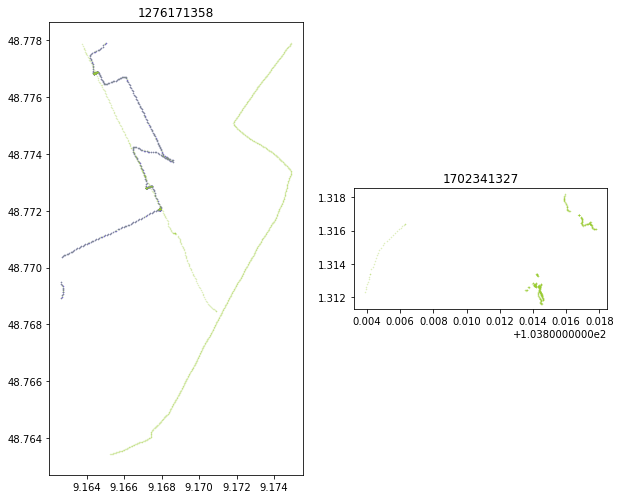

In [142]:
import matplotlib.pyplot as plt
# create Matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(10,10))
# plot points
for i in range(2):
    gdf = gdfs[i]
    city_id = gdf.iloc[0]['city_id']
    if gdf[gdf['source'] == 'KartaView'].empty == False:
        gdf[gdf['source'] == 'KartaView'].plot(ax=axes[i], marker='o', color='slateblue', markersize=.3, alpha=1)
    if gdf[gdf['source'] == 'Mapillary'].empty == False:
        gdf[gdf['source'] == 'Mapillary'].plot(ax=axes[i], marker='o', color='yellowgreen', markersize=.3, alpha=.3)
    axes[i].set_title(city_id)

### Merge output

In this demo, we are merging the multiple output CSVs in the directory './output/raw_download/reproduce_false'. The merged output will be used for the subsequent enrichment demo in /code/enrichment.

In [143]:
def combine(read_folder, save_path):
    try:
        ls_df = []
        for name in os.listdir(read_folder):
            if name != '.DS_Store':
                read_path = os.path.join(read_folder, name)
                if os.path.isfile(read_path):
                    df = pd.read_csv(read_path)
                    ls_df.append(df) 
        combined_df = pd.concat(ls_df).reset_index(drop=True)
        save_path = os.path.join(save_path)
        combined_df.to_csv(save_path, index=False)
        print("Output merged successfully")
    except Exception as e:
        print(e)
    
read_folder = './sample_output/reproduce_false' # path to the folder with CSVs to be combined - please modify as needed
save_path = './sample_output/points.csv' # output path for the combined CSV - please modify as needed
combine(read_folder, save_path)

Output merged successfully


In [144]:
points = pd.read_csv(save_path)
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mly_captured_at             1892 non-null   float64
 1   heading                     2319 non-null   float64
 2   mly_creator_id              1892 non-null   float64
 3   orig_id                     2319 non-null   int64  
 4   mly_is_pano                 1892 non-null   object 
 5   mly_sequence_id             1892 non-null   object 
 6   mly_organization_id         0 non-null      float64
 7   city_id                     2319 non-null   int64  
 8   lat                         2319 non-null   float64
 9   lon                         2319 non-null   float64
 10  source                      2319 non-null   object 
 11  kv_autoImgProcessingResult  427 non-null    object 
 12  kv_autoImgProcessingStatus  427 non-null    object 
 13  kv_dateAdded                427 n

In [145]:
points.city_id.value_counts()

1276171358    1725
1702341327     594
Name: city_id, dtype: int64